In [1]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [2]:
path = r"D:\TRAVAIL\Inge_3\Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré\network_analysis\data\dataset_clean.csv"

In [3]:
TARGET = "L7Protocol"

# Import df

In [4]:
df = pd.read_csv(path)

list_protocol = [
    "AMAZON",
    "MICROSOFT",
    "YOUTUBE",
    "GMAIL",
    "WINDOWS_UPDATE",
    "SKYPE",
    "FACEBOOK",
    "DROPBOX",
]
df = df[df["ProtocolName"].isin(list_protocol)]
df = df.drop(
    [
        "ProtocolName",
        "Month",
        "Day",
        "Protocol",
        "ECE.Flag.Count",
        "RST.Flag.Count",
        "Active.Max",
        "Active.Min",
        "Idle.Mean",
        "Idle.Max",
        "Active.Mean",
        "Idle.Std",
        "Bwd.Packet.Length.Min",
        "FIN.Flag.Count",
        "Min.Packet.Length",
        "Idle.Min",
        "Active.Std",
        "URG.Flag.Count",
        "SYN.Flag.Count",
        "ACK.Flag.Count",
        "Fwd.Packet.Length.Min",
        "Fwd.PSH.Flags",
        "PSH.Flag.Count",
        "Subflow.Fwd.Packets",
        "Total.Fwd.Packets",
        "Subflow.Bwd.Packets",
        "Subflow.Bwd.Bytes",
        "Total.Length.of.Bwd.Packets",
        "Down.Up.Ratio",
        "Bwd.Header.Length",
        "Packet.Length.Variance",
        "Packet.Length.Mean",
        "Subflow.Fwd.Bytes",
        "Max.Packet.Length",
        "Packet.Length.Std",
        "min_seg_size_forward",
        "Fwd.IAT.Max",
        "Average.Packet.Size",
        "Flow.IAT.Mean",
        "Flow.Packets.s",
        "Fwd.Packet.Length.Max",
        "act_data_pkt_fwd",
        "Fwd.Header.Length",
        "Fwd.Header.Length.1",
        "Avg.Bwd.Segment.Size",
        "Bwd.Packet.Length.Min",
        "Total.Backward.Packets",
        "Bwd.Packet.Length.Max",
        "Bwd.Packet.Length.Std",
        "Flow.IAT.Std",
        "Bwd.IAT.Min",
        "Fwd.IAT.Total",
        "Fwd.IAT.Std",
        "Flow.ID",
        "Source.IP",
        "Destination.IP",
        "Bwd.Packet.Length.Mean",
    ],
    axis=1,
)

# X et y

In [32]:
# y = pd.get_dummies(df[TARGET])
y = df[TARGET]
X = df.drop([TARGET], axis=1)

In [34]:
y = y.to_numpy()

In [36]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))

# Modèle

In [39]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 20), activation="relu", return_sequences=True))
model.add(LSTM(128, activation="relu"))
model.add(Dense(y.shape[1], activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 128)            76288     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 213)               27477     
                                                                 
Total params: 235,349
Trainable params: 235,349
Non-trainable params: 0
_________________________________________________________________


In [40]:
earlystopping = callbacks.EarlyStopping(
    monitor="val_loss", mode="min", patience=3, restore_best_weights=True
)

In [41]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_test, y_test),
    callbacks=[earlystopping],
)
history

Epoch 1/25
11797/11797 [==============================] - 64s 5ms/step - loss: 0.0126 - accuracy: 0.5407 - val_loss: 0.0086 - val_accuracy: 0.6101
Epoch 2/25
11797/11797 [==============================] - 65s 5ms/step - loss: 0.0079 - accuracy: 0.6568 - val_loss: 0.0075 - val_accuracy: 0.6794
Epoch 3/25
11797/11797 [==============================] - 63s 5ms/step - loss: 0.0072 - accuracy: 0.6929 - val_loss: 0.0070 - val_accuracy: 0.7019
Epoch 4/25
11797/11797 [==============================] - 62s 5ms/step - loss: 0.0067 - accuracy: 0.7104 - val_loss: 0.0066 - val_accuracy: 0.7172
Epoch 5/25
11797/11797 [==============================] - 75s 6ms/step - loss: 0.0064 - accuracy: 0.7217 - val_loss: 0.0064 - val_accuracy: 0.7287
Epoch 6/25
11797/11797 [==============================] - 75s 6ms/step - loss: 0.0063 - accuracy: 0.7299 - val_loss: 0.0062 - val_accuracy: 0.7337
Epoch 7/25
11797/11797 [==============================] - 67s 6ms/step - loss: 0.0061 - accuracy: 0.7367 - val_loss: 0

In [42]:
accuracy = model.evaluate(X_test, y_test)
accuracy  # 0.7783

2950/2950 [==============================] - 7s 2ms/step - loss: 0.0052 - accuracy: 0.7727


[0.005232400260865688, 0.7727267742156982]

# Graph

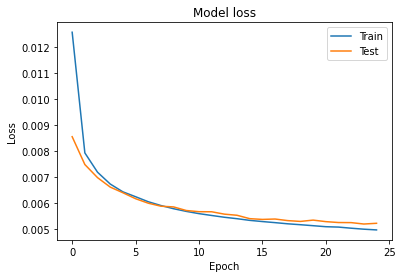

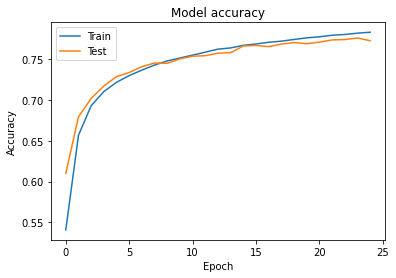

In [43]:
# loss plot function
def plot_loss(loss, val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper right")
    plt.show()


# accuracy plot function
def plot_accuracy(acc, val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()


# plot loss and accuracy curves
plot_loss(history.history["loss"], history.history["val_loss"])
plot_accuracy(history.history["accuracy"], history.history["val_accuracy"])